In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
'''plt.style.use("seaborn")'''
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
seed = 1

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv(r"/content/drive/MyDrive/Minor project/Final Metal Nitride Dataset (1).csv")
df

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance (F/g)
0,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.095,0.816,36.72736,478.32,0.090,6,5.4,2.6,0.97,0.60,-0.9700,0.4774,113.60
1,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.090,1.633,36.72736,478.32,0.090,6,8.1,2.6,0.97,0.60,-0.9600,0.7886,101.80
2,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.085,2.449,36.72736,478.32,0.090,6,10.8,2.6,0.97,0.60,-0.9500,1.1240,95.93
3,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.080,3.265,36.72736,478.32,0.090,6,13.5,2.6,0.97,0.60,-0.9400,1.4590,91.54
4,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.075,4.082,36.72736,478.32,0.090,6,16.2,2.6,0.97,0.60,-0.9300,1.7950,87.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,70.820,96.200,7.00000,179.00,0.003,6,189.0,3.6,1.00,0.57,-0.8454,19.0400,62.04
724,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,73.720,97.000,7.00000,179.00,0.003,6,190.0,3.6,1.00,0.57,-0.8535,19.2100,61.59
725,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,74.550,97.800,7.00000,179.00,0.003,6,192.0,3.6,1.00,0.57,-0.8616,19.3800,61.59
726,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,78.270,98.600,7.00000,179.00,0.003,6,194.0,3.6,1.00,0.57,-0.8697,19.5500,61.13


In [45]:
print(df.columns)

Index(['Material 1', 'Material 2', 'Electrolyte', 'Electrode Configuration',
       'N%', 'Pore size distribution (cm3 g-1 nm-1)', 'Pore diameter (nm)',
       'Average Pore Diameter (nm)', 'SSA (m2/g)', 'Vt cm3/g',
       'Electrolytr Concentration (mol/L)', 'Scan rate (mV/s)', 'Rs (Ohm)',
       'Rct (Ohn)', 'Electrolytr Ionic Conductivity ( S/cm)', 'Potential (V)',
       'Current Density (A/g)', 'Capacitance (F/g)'],
      dtype='object')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Material 1                              728 non-null    object 
 1   Material 2                              728 non-null    object 
 2   Electrolyte                             728 non-null    object 
 3   Electrode Configuration                 728 non-null    object 
 4   N%                                      728 non-null    float64
 5   Pore size distribution (cm3 g-1 nm-1)   728 non-null    float64
 6   Pore diameter (nm)                      728 non-null    float64
 7   Average Pore Diameter (nm)              728 non-null    float64
 8   SSA (m2/g)                              728 non-null    float64
 9   Vt cm3/g                                728 non-null    float64
 10  Electrolytr Concentration (mol/L)       728 non-null    int64 

In [47]:
df.isnull()

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance (F/g)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
724,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
#df.drop("Scan rate (mV/s)", axis='columns', inplace= True)

In [49]:
df.isnull().sum()

,0
Material 1,0
Material 2,0
Electrolyte,0
Electrode Configuration,0
N%,0
Pore size distribution (cm3 g-1 nm-1),0
Pore diameter (nm),0
Average Pore Diameter (nm),0
SSA (m2/g),0
Vt cm3/g,0


In [50]:
df.isnull().sum().sum()

0

In [51]:
df.rename(columns = {'Capacitance (F/g)':'Capacitance'}, inplace = True)

In [52]:
df2 = df.fillna(value = 0)
df2

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance
0,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.095,0.816,36.72736,478.32,0.090,6,5.4,2.6,0.97,0.60,-0.9700,0.4774,113.60
1,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.090,1.633,36.72736,478.32,0.090,6,8.1,2.6,0.97,0.60,-0.9600,0.7886,101.80
2,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.085,2.449,36.72736,478.32,0.090,6,10.8,2.6,0.97,0.60,-0.9500,1.1240,95.93
3,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.080,3.265,36.72736,478.32,0.090,6,13.5,2.6,0.97,0.60,-0.9400,1.4590,91.54
4,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.075,4.082,36.72736,478.32,0.090,6,16.2,2.6,0.97,0.60,-0.9300,1.7950,87.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,70.820,96.200,7.00000,179.00,0.003,6,189.0,3.6,1.00,0.57,-0.8454,19.0400,62.04
724,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,73.720,97.000,7.00000,179.00,0.003,6,190.0,3.6,1.00,0.57,-0.8535,19.2100,61.59
725,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,74.550,97.800,7.00000,179.00,0.003,6,192.0,3.6,1.00,0.57,-0.8616,19.3800,61.59
726,TiN (Titanium Nitride),Carbon cloth,KOH,Three electrode,19.63,78.270,98.600,7.00000,179.00,0.003,6,194.0,3.6,1.00,0.57,-0.8697,19.5500,61.13


In [53]:
df2.isnull().sum().sum()

0

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Material 1                              728 non-null    object 
 1   Material 2                              728 non-null    object 
 2   Electrolyte                             728 non-null    object 
 3   Electrode Configuration                 728 non-null    object 
 4   N%                                      728 non-null    float64
 5   Pore size distribution (cm3 g-1 nm-1)   728 non-null    float64
 6   Pore diameter (nm)                      728 non-null    float64
 7   Average Pore Diameter (nm)              728 non-null    float64
 8   SSA (m2/g)                              728 non-null    float64
 9   Vt cm3/g                                728 non-null    float64
 10  Electrolytr Concentration (mol/L)       728 non-null    int64 

In [55]:
df2.describe()

,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,21.527445,5.999210,40.268413,25.608419,194.203655,0.121584,3.337912,96.443956,1.998970,0.576489,0.464805,-0.084248,6.973132,73.796313
std,7.576395,13.114709,25.095916,15.236601,176.125944,0.154743,2.387172,159.187937,1.245422,0.392844,0.246744,0.635837,6.684627,47.005172
min,10.000000,0.000000,0.816000,6.900000,0.013000,0.000125,1.000000,5.400000,0.010000,0.010000,0.056000,-1.080000,-12.280000,9.876000
25%,18.700000,0.019000,20.155000,7.000000,57.000000,0.003000,1.000000,11.750000,1.000000,0.270000,0.195000,-0.607600,2.247500,31.120000
50%,21.570000,0.119350,33.898000,27.911000,163.500000,0.070000,2.000000,50.000000,2.490000,0.800000,0.570000,-0.226950,5.103700,63.285000
75%,22.000000,5.347250,57.412500,36.727360,252.500000,0.090000,6.000000,96.000000,2.600000,1.000000,0.600000,0.431825,9.861500,126.500000
max,34.670000,78.270000,101.100000,54.241000,501.470000,0.549000,6.000000,980.000000,3.600000,1.000000,0.800000,1.408000,29.950000,182.000000


In [56]:
df2.head()

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance
0,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.095,0.816,36.72736,478.32,0.09,6,5.4,2.6,0.97,0.6,-0.97,0.4774,113.60
1,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.090,1.633,36.72736,478.32,0.09,6,8.1,2.6,0.97,0.6,-0.96,0.7886,101.80
2,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.085,2.449,36.72736,478.32,0.09,6,10.8,2.6,0.97,0.6,-0.95,1.1240,95.93
3,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.080,3.265,36.72736,478.32,0.09,6,13.5,2.6,0.97,0.6,-0.94,1.4590,91.54
4,VN (Vanadium Nitirde),Amorphus Casrbon,KOH,three electrode,21.57,0.075,4.082,36.72736,478.32,0.09,6,16.2,2.6,0.97,0.6,-0.93,1.7950,87.61


In [57]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
N%,728.0,21.527445,7.576395,10.000000,18.7000,21.57000,22.000000,34.670
Pore size distribution (cm3 g-1 nm-1),728.0,5.999210,13.114709,0.000000,0.0190,0.11935,5.347250,78.270
Pore diameter (nm),728.0,40.268413,25.095916,0.816000,20.1550,33.89800,57.412500,101.100
Average Pore Diameter (nm),728.0,25.608419,15.236601,6.900000,7.0000,27.91100,36.727360,54.241
SSA (m2/g),728.0,194.203655,176.125944,0.013000,57.0000,163.50000,252.500000,501.470
Vt cm3/g,728.0,0.121584,0.154743,0.000125,0.0030,0.07000,0.090000,0.549
Electrolytr Concentration (mol/L),728.0,3.337912,2.387172,1.000000,1.0000,2.00000,6.000000,6.000
Scan rate (mV/s),728.0,96.443956,159.187937,5.400000,11.7500,50.00000,96.000000,980.000
Rs (Ohm),728.0,1.998970,1.245422,0.010000,1.0000,2.49000,2.600000,3.600
Rct (Ohn),728.0,0.576489,0.392844,0.010000,0.2700,0.80000,1.000000,1.000


In [58]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns
df2['Material 1']= label_encoder.fit_transform(df2['Material 1'])
df2['Material 2']= label_encoder.fit_transform(df2['Material 2'])
df2['Electrolyte']= label_encoder.fit_transform(df2['Electrolyte'])
df2['Electrode Configuration']= label_encoder.fit_transform(df2['Electrode Configuration'])
df2['Material 1'].unique(),df2['Material 2'].unique(),df2['Electrode Configuration'].unique(),df2['Electrolyte'].unique()

(array([5, 3, 4, 0, 2, 1]),
 array([ 2,  9, 10,  4,  6,  5,  0,  8,  1,  7,  3]),
 array([3, 1, 2, 0]),
 array([2, 1, 0, 3]))

In [59]:
X = df2.drop(['Capacitance'],axis = 1)
X

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g)
0,5,2,2,3,21.57,0.095,0.816,36.72736,478.32,0.090,6,5.4,2.6,0.97,0.60,-0.9700,0.4774
1,5,2,2,3,21.57,0.090,1.633,36.72736,478.32,0.090,6,8.1,2.6,0.97,0.60,-0.9600,0.7886
2,5,2,2,3,21.57,0.085,2.449,36.72736,478.32,0.090,6,10.8,2.6,0.97,0.60,-0.9500,1.1240
3,5,2,2,3,21.57,0.080,3.265,36.72736,478.32,0.090,6,13.5,2.6,0.97,0.60,-0.9400,1.4590
4,5,2,2,3,21.57,0.075,4.082,36.72736,478.32,0.090,6,16.2,2.6,0.97,0.60,-0.9300,1.7950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,3,2,1,19.63,70.820,96.200,7.00000,179.00,0.003,6,189.0,3.6,1.00,0.57,-0.8454,19.0400
724,1,3,2,1,19.63,73.720,97.000,7.00000,179.00,0.003,6,190.0,3.6,1.00,0.57,-0.8535,19.2100
725,1,3,2,1,19.63,74.550,97.800,7.00000,179.00,0.003,6,192.0,3.6,1.00,0.57,-0.8616,19.3800
726,1,3,2,1,19.63,78.270,98.600,7.00000,179.00,0.003,6,194.0,3.6,1.00,0.57,-0.8697,19.5500


In [60]:
Y = df2.Capacitance
Y

,Capacitance
0,113.60
1,101.80
2,95.93
3,91.54
4,87.61
...,...
723,62.04
724,61.59
725,61.59
726,61.13


In [61]:
X.shape

(728, 17)

In [62]:
Y.shape

(728,)

In [63]:
'''# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns
X['Material 1']= label_encoder.fit_transform(X['Material 1'])
X['Material 2']= label_encoder.fit_transform(X['Material 2'])
X['Electrolyte']= label_encoder.fit_transform(X['Electrolyte'])
X['Electrode Configuration']= label_encoder.fit_transform(X['Electrode Configuration'])
X['Material 1'].unique(),X['Material 2'].unique(),X['Electrode Configuration'].unique(),X['Electrolyte'].unique()'''

"# Import label encoder\nfrom sklearn import preprocessing\n\n# label_encoder object knows\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in columns\nX['Material 1']= label_encoder.fit_transform(X['Material 1'])\nX['Material 2']= label_encoder.fit_transform(X['Material 2'])\nX['Electrolyte']= label_encoder.fit_transform(X['Electrolyte'])\nX['Electrode Configuration']= label_encoder.fit_transform(X['Electrode Configuration'])\nX['Material 1'].unique(),X['Material 2'].unique(),X['Electrode Configuration'].unique(),X['Electrolyte'].unique()"

In [64]:
corr=df2.corr()
corr

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance
Material 1,1.000000,0.628273,-0.081169,0.565566,-0.526459,-0.140116,0.264453,0.616082,0.869583,0.399148,0.272459,-0.168112,0.177998,0.639735,0.139394,-0.698863,0.131137,0.020058
Material 2,0.628273,1.000000,-0.160007,0.193182,-0.297103,-0.097862,0.143975,0.327393,0.561072,0.311218,0.426422,-0.246452,0.019707,0.474815,0.215229,-0.470389,0.228956,-0.040594
Electrolyte,-0.081169,-0.160007,1.000000,-0.019306,-0.404351,-0.034966,-0.134600,-0.213774,0.014411,-0.027741,-0.081500,-0.525533,0.520472,-0.282084,-0.876306,-0.136535,-0.010749,-0.632272
Electrode Configuration,0.565566,0.193182,-0.019306,1.000000,0.191632,-0.235351,-0.056600,0.425986,0.643160,0.205613,0.137424,-0.028005,0.292717,0.138415,0.048865,-0.168347,0.259783,-0.225222
N%,-0.526459,-0.297103,-0.404351,0.191632,1.000000,-0.244565,-0.378619,0.044210,-0.453125,-0.142124,-0.244380,0.406297,-0.411742,-0.562923,0.301629,0.752526,-0.010070,0.235910
Pore size distribution (cm3 g-1 nm-1),-0.140116,-0.097862,-0.034966,-0.235351,-0.244565,1.000000,0.515105,-0.550724,-0.056628,-0.347505,0.502418,0.053714,0.402994,0.487435,0.190391,-0.303569,0.401794,-0.071313
Pore diameter (nm),0.264453,0.143975,-0.134600,-0.056600,-0.378619,0.515105,1.000000,-0.004931,0.217250,0.050460,0.244751,0.169184,0.130711,0.467592,0.180616,-0.127904,0.509067,-0.084340
Average Pore Diameter (nm),0.616082,0.327393,-0.213774,0.425986,0.044210,-0.550724,-0.004931,1.000000,0.401776,0.529769,-0.343779,0.031442,-0.351350,-0.001533,0.110463,-0.118714,-0.226152,0.447859
SSA (m2/g),0.869583,0.561072,0.014411,0.643160,-0.453125,-0.056628,0.217250,0.401776,1.000000,0.613820,0.199692,-0.193476,0.537053,0.490874,-0.089790,-0.716293,0.053557,-0.271071
Vt cm3/g,0.399148,0.311218,-0.027741,0.205613,-0.142124,-0.347505,0.050460,0.529769,0.613820,1.000000,-0.476212,-0.089220,0.234889,-0.165391,-0.349051,-0.286906,-0.479039,-0.051952


In [65]:

corr.style.background_gradient(cmap='coolwarm')

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g),Capacitance
Material 1,1.000000,0.628273,-0.081169,0.565566,-0.526459,-0.140116,0.264453,0.616082,0.869583,0.399148,0.272459,-0.168112,0.177998,0.639735,0.139394,-0.698863,0.131137,0.020058
Material 2,0.628273,1.000000,-0.160007,0.193182,-0.297103,-0.097862,0.143975,0.327393,0.561072,0.311218,0.426422,-0.246452,0.019707,0.474815,0.215229,-0.470389,0.228956,-0.040594
Electrolyte,-0.081169,-0.160007,1.000000,-0.019306,-0.404351,-0.034966,-0.134600,-0.213774,0.014411,-0.027741,-0.081500,-0.525533,0.520472,-0.282084,-0.876306,-0.136535,-0.010749,-0.632272
Electrode Configuration,0.565566,0.193182,-0.019306,1.000000,0.191632,-0.235351,-0.056600,0.425986,0.643160,0.205613,0.137424,-0.028005,0.292717,0.138415,0.048865,-0.168347,0.259783,-0.225222
N%,-0.526459,-0.297103,-0.404351,0.191632,1.000000,-0.244565,-0.378619,0.044210,-0.453125,-0.142124,-0.244380,0.406297,-0.411742,-0.562923,0.301629,0.752526,-0.010070,0.235910
Pore size distribution (cm3 g-1 nm-1),-0.140116,-0.097862,-0.034966,-0.235351,-0.244565,1.000000,0.515105,-0.550724,-0.056628,-0.347505,0.502418,0.053714,0.402994,0.487435,0.190391,-0.303569,0.401794,-0.071313
Pore diameter (nm),0.264453,0.143975,-0.134600,-0.056600,-0.378619,0.515105,1.000000,-0.004931,0.217250,0.050460,0.244751,0.169184,0.130711,0.467592,0.180616,-0.127904,0.509067,-0.084340
Average Pore Diameter (nm),0.616082,0.327393,-0.213774,0.425986,0.044210,-0.550724,-0.004931,1.000000,0.401776,0.529769,-0.343779,0.031442,-0.351350,-0.001533,0.110463,-0.118714,-0.226152,0.447859
SSA (m2/g),0.869583,0.561072,0.014411,0.643160,-0.453125,-0.056628,0.217250,0.401776,1.000000,0.613820,0.199692,-0.193476,0.537053,0.490874,-0.089790,-0.716293,0.053557,-0.271071
Vt cm3/g,0.399148,0.311218,-0.027741,0.205613,-0.142124,-0.347505,0.050460,0.529769,0.613820,1.000000,-0.476212,-0.089220,0.234889,-0.165391,-0.349051,-0.286906,-0.479039,-0.051952


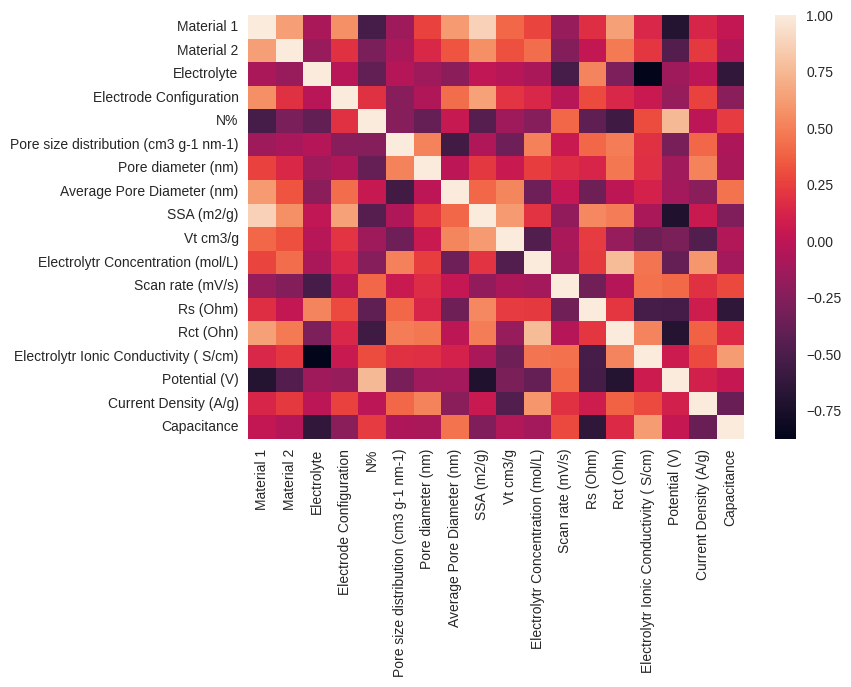

In [66]:

sns.heatmap(df2.corr())
plt.savefig("correlation_matrix.png")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=None)

In [67]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(509, 17) (219, 17) (509,) (219,)


In [68]:
X_train

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g)
14,5,2,2,3,21.57,0.037000,12.245,36.72736,478.320,0.090000,6,43.2,2.60,0.970,0.600,-0.8300,5.1570
572,2,7,2,0,10.00,7.607000,44.700,6.90000,148.000,0.000125,6,43.0,1.40,1.000,0.570,-0.5100,8.0000
147,3,4,2,2,18.70,0.020742,76.800,32.60000,501.470,0.549000,1,10.0,3.60,0.404,0.195,-0.2600,-0.4702
590,2,7,2,0,10.00,9.718000,65.400,6.90000,148.000,0.000125,6,63.0,1.40,1.000,0.570,-0.3300,12.5000
483,0,1,3,1,22.00,0.140100,24.860,17.40000,57.000,0.070000,1,10.0,2.49,0.010,0.056,0.4100,5.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0,1,3,1,22.00,0.076710,34.540,17.40000,57.000,0.070000,1,10.0,2.49,0.010,0.056,0.6200,8.8200
118,3,10,2,1,18.70,0.020014,30.400,32.60000,501.470,0.549000,1,155.8,3.60,0.404,0.195,-0.7200,2.6110
713,1,3,2,1,19.63,53.020000,88.200,7.00000,179.000,0.003000,6,172.0,3.60,1.000,0.570,-0.7512,17.3400
39,5,9,2,3,21.57,0.020000,32.653,36.72736,478.320,0.090000,6,90.0,2.60,0.970,0.600,-0.5800,13.5700


In [69]:
Y_train

,Capacitance
14,64.13
572,53.88
147,29.65
590,44.97
483,20.26
...,...
525,12.78
118,31.65
713,63.85
39,36.58


In [70]:
X_test

,Material 1,Material 2,Electrolyte,Electrode Configuration,N%,Pore size distribution (cm3 g-1 nm-1),Pore diameter (nm),Average Pore Diameter (nm),SSA (m2/g),Vt cm3/g,Electrolytr Concentration (mol/L),Scan rate (mV/s),Rs (Ohm),Rct (Ohn),Electrolytr Ionic Conductivity ( S/cm),Potential (V),Current Density (A/g)
411,0,1,3,1,22.00,0.04502,7.700,17.400,57.000,0.070,1,10.0,2.49,0.01,0.056,0.0500,0.8400
364,0,8,2,1,34.67,0.00300,14.407,27.911,0.013,0.070,6,50.0,0.67,0.27,0.600,0.3450,3.2110
684,1,3,2,1,19.63,28.39000,65.000,7.000,179.000,0.003,6,122.0,3.60,1.00,0.570,-0.2986,12.4100
190,4,6,2,1,14.45,0.25000,35.700,54.241,252.500,0.219,2,99.0,1.00,0.80,0.505,-0.7600,1.8800
192,4,6,2,1,14.45,0.25240,37.400,54.241,252.500,0.219,2,6.0,1.00,0.80,0.505,-0.7380,1.9740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,4,6,2,1,14.45,0.17780,79.050,54.241,252.500,0.219,2,20.0,1.00,0.80,0.505,-0.2760,3.9010
228,4,6,2,1,14.45,0.20370,74.800,54.241,252.500,0.219,2,101.0,1.00,0.80,0.505,-0.3420,3.6660
460,0,1,3,1,22.00,0.16070,19.800,17.400,57.000,0.070,1,10.0,2.49,0.01,0.056,0.3000,4.2000
657,1,3,2,1,19.63,21.98000,43.400,7.000,179.000,0.003,6,76.5,3.60,1.00,0.570,-0.3391,6.6300


In [71]:
Y_test

,Capacitance
411,54.77
364,141.60
684,68.84
190,148.90
192,147.30
...,...
233,132.40
228,134.00
460,25.30
657,79.49


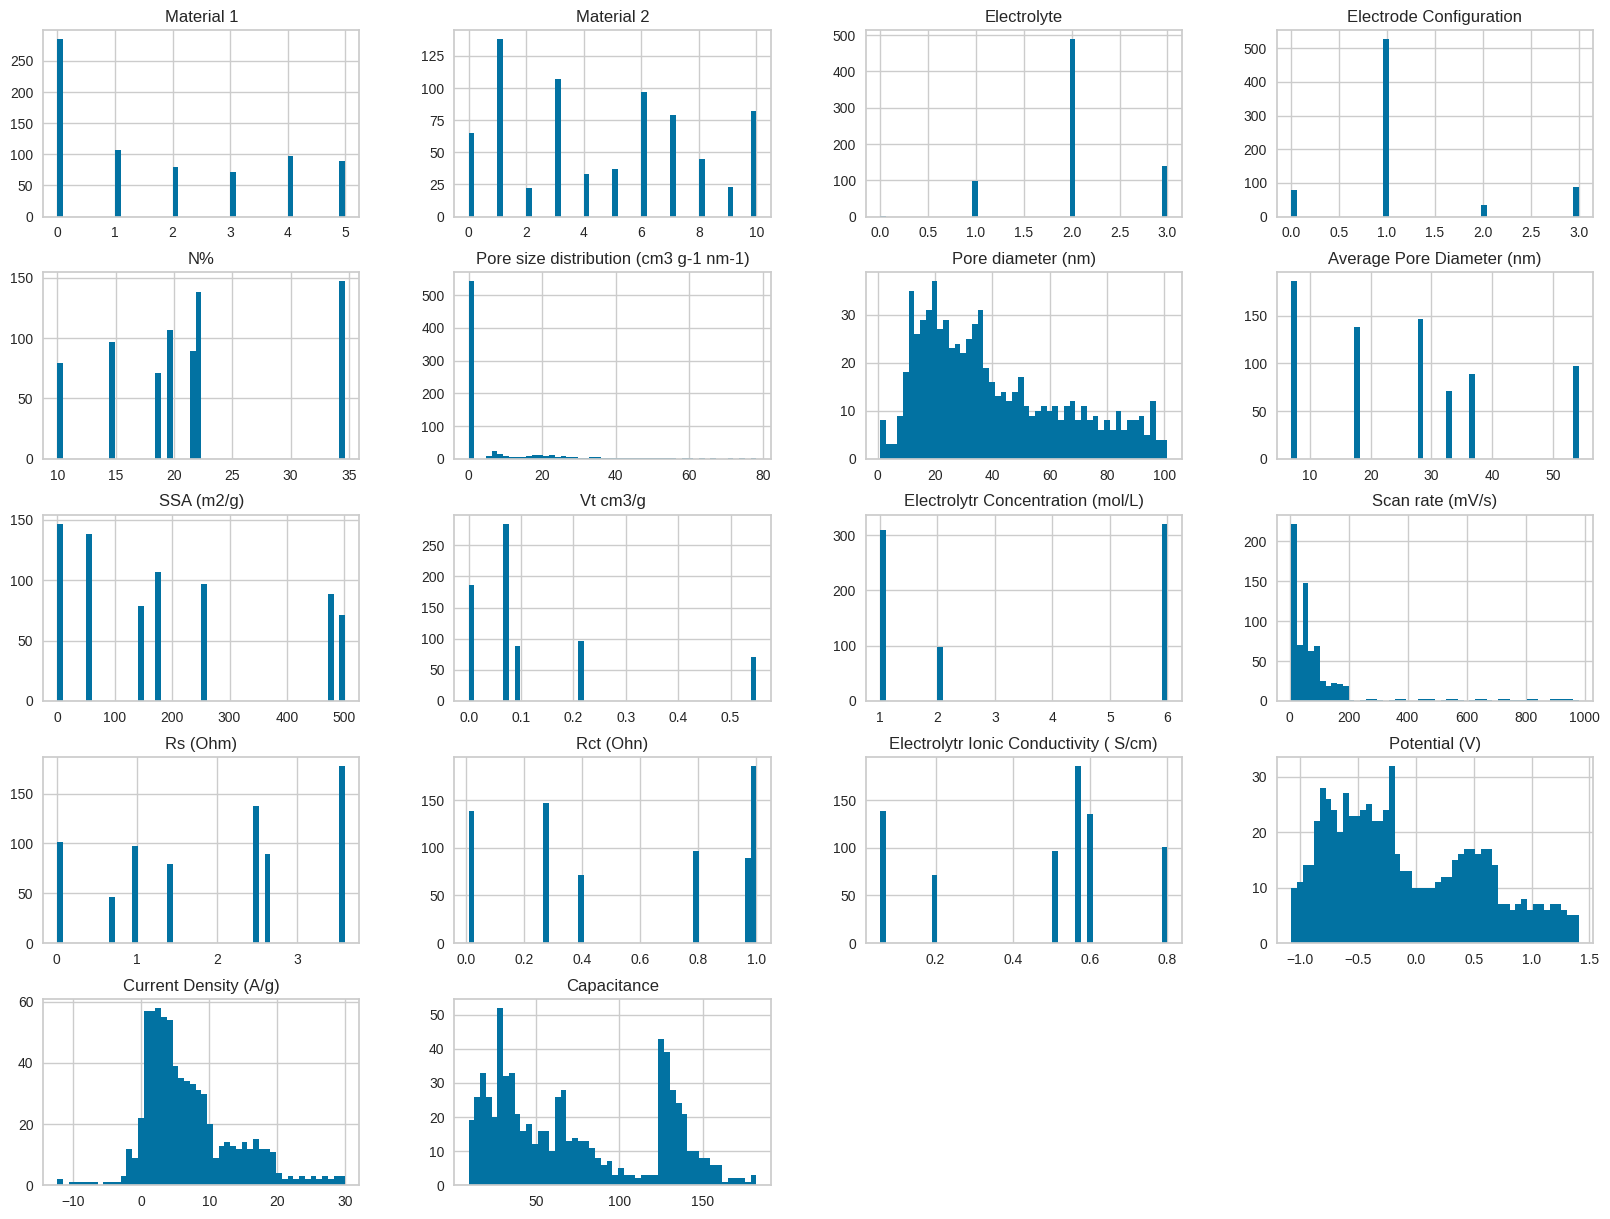

In [72]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('figrfr1.png')
plt.show()

#ML Models#


The R2 Score is:  0.9763223292775038
The EVS is: 0.9763
The RMSE is: 7.0623
The MAE is: 5.0522


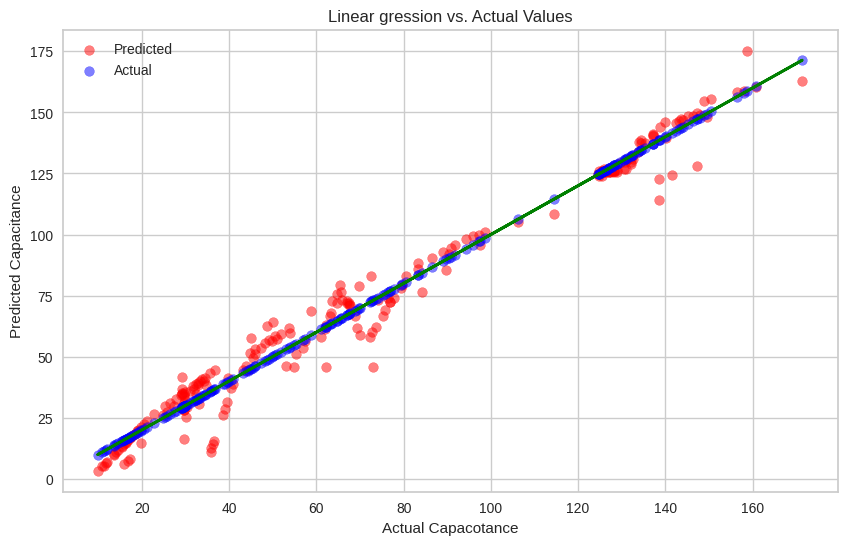

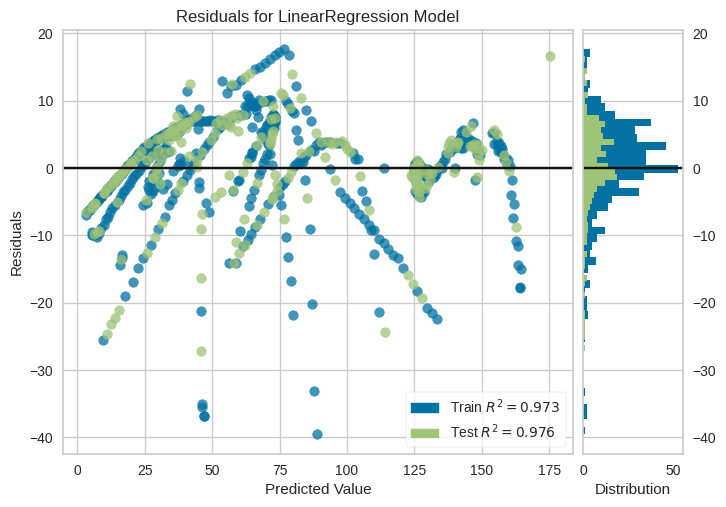

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
#lINEAR REGRESSION
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
print("The R2 Score is: ",regr.score(X_test, Y_test))
y_pred_lr = regr.predict(X_test)
print('The EVS is: %.4f'% explained_variance_score(Y_test, y_pred_lr))
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, y_pred_lr)))
print('The MAE is: %.4f'% mean_absolute_error(Y_test, y_pred_lr))

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_lr, alpha=0.5, color='red', label='Predicted')
plt.scatter(Y_test, Y_test, alpha=0.5, color='blue', label='Actual')


plt.plot(Y_test,Y_test, color='green', linewidth=2)

plt.title('Linear gression vs. Actual Values')
plt.xlabel('Actual Capacotance')
plt.ylabel('Predicted Capacitance')
plt.legend()
plt.show()
print()
print()

from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

In [74]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = seed)
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)
print(regressor.score(X_test,Y_test))

0.9945637938316442


In [75]:
'''from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))'''

"from sklearn.neural_network import MLPClassifier\nclf = MLPClassifier(solver='lbfgs', alpha=1e-5,\n                    hidden_layer_sizes=(5, 2), random_state=1)\nclf.fit(X_train, Y_train)\nprint(clf.score(X_test, Y_test))"

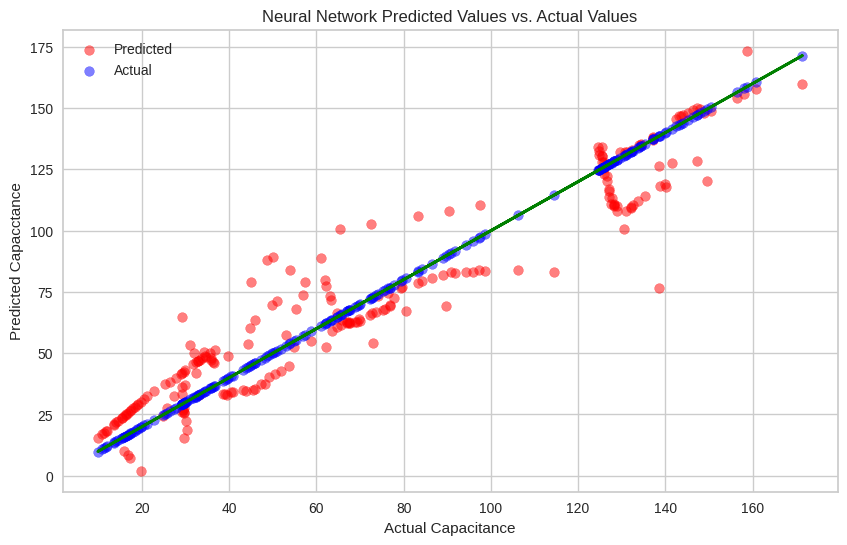

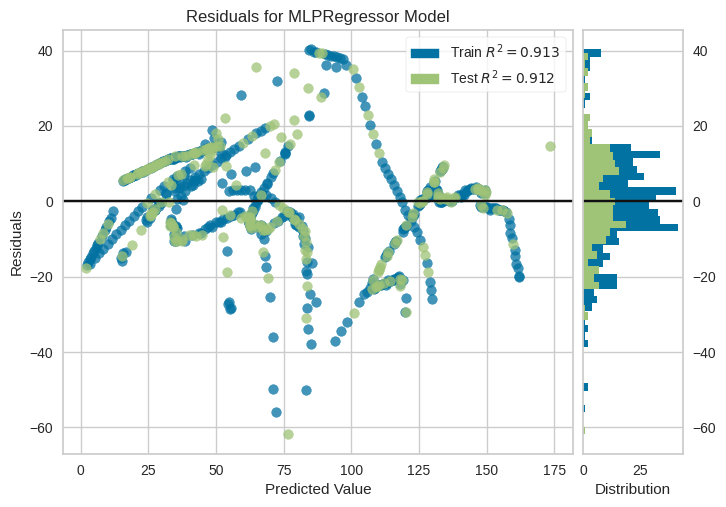

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [76]:
#Artfical neural network(ANNN)
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(
    hidden_layer_sizes=(10,),  # One hidden layer with 100 neurons
    activation='relu',          # 'relu' activation function
    solver='adam',              # 'adam' solver for weight optimization
    max_iter=500,               # Set the number of iterations (epochs)
    random_state=seed             # Set the seed for reproducibility
)
nn_model.fit(X_train, Y_train)

# Predicting the water pollution values using the air quality index from the test set
y_pred_nn = nn_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_nn, alpha=0.5, color='red', label='Predicted')
plt.scatter(Y_test, Y_test, alpha=0.5, color='blue', label='Actual')


plt.plot(Y_test,Y_test, color='green', linewidth=2)

plt.title('Neural Network Predicted Values vs. Actual Values')
plt.xlabel('Actual Capacitance')
plt.ylabel('Predicted Capacctance')
plt.legend()
plt.show()
print()
print()

from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(nn_model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

In [77]:
#ANN Score
print("The R2 score is: ",nn_model.score(X_test,Y_test))
print('The EVS is: %.4f'% explained_variance_score(Y_test, y_pred_nn))
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, y_pred_nn)))
print('The MAE is: %.4f'% mean_absolute_error(Y_test, y_pred_nn))

The R2 score is:  0.911694938752926
The EVS is: 0.9118
The RMSE is: 13.6387
The MAE is: 10.5748


R2 score for KNN:  0.9921600272357181
MSE for KNN:  16.514813461187213


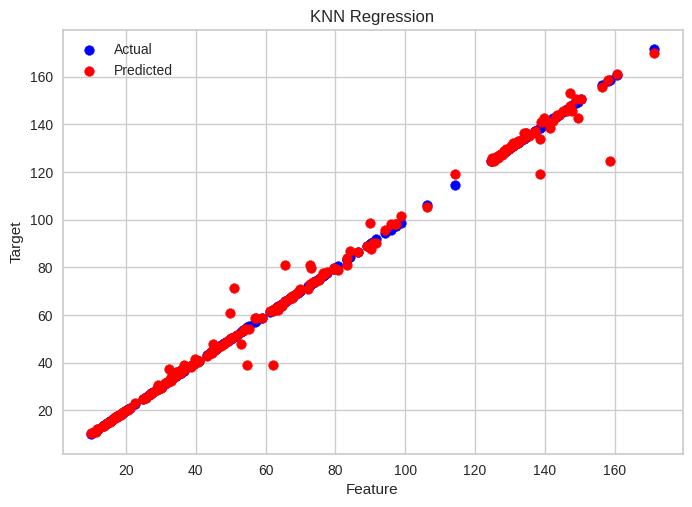

In [78]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("R2 score for KNN: ",r2)
print("MSE for KNN: ", mse)

#Visualizing the results
# Visualize the results
plt.scatter(Y_test, Y_test, color='blue', label='Actual')
plt.scatter(Y_test, y_pred, color='red', label='Predicted')
plt.title('KNN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [79]:
#Bayesian ridge regression (BRR)
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()
BayReg.fit(X_train,Y_train)
Y2_train_pred = BayReg.predict(X_test)
print(BayReg.score(X_test, Y_test))

0.9760614622774958


In [80]:
#Radom forest regressor
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)


In [81]:
print(Y_train_pred)

[ 63.5706  53.8964  29.6267  44.9715  20.2596 128.137  110.0499  23.4387
 139.388   38.3294 153.888  133.1948  57.6637  58.606   40.3852  17.0648
 127.4012  66.3573  55.8797 160.153   95.5951  87.9919 126.0166  65.2631
 130.182   29.0779 151.265   41.2742 136.706   89.3989  17.1651  31.2112
 137.8001  79.6786  69.053   28.5718 127.616   67.8496  18.1725  36.7877
  85.2734 108.915  126.0348  24.6561 133.953   15.0296 127.1484  35.575
  80.3847  69.1303  13.296   20.3908  16.244   20.6469  28.1627 156.934
 128.5672  19.4417  70.6786  29.556   27.0135  22.301   41.4018  98.5465
  29.5921 128.7989  83.816  102.3018  49.2507 129.548   37.9079  34.8744
  12.9371  37.4442  53.4155 149.482   61.9347  30.3675  36.697   39.1338
  87.3061 126.6529  55.1905 130.7766 126.601   54.4873  62.8847 140.375
  63.9443  43.5211  68.1466  26.7821  29.4982  27.435   99.6106  59.0019
 127.18    15.7115 137.0365 126.5845  30.9152 137.2605  29.3586 126.6147
 126.591   32.1516 134.4824  51.8583  43.3539 148.008 

In [82]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [83]:
predictions1

,Y_train,Y_train_pred
14,64.13,63.5706
572,53.88,53.8964
147,29.65,29.6267
590,44.97,44.9715
483,20.26,20.2596
...,...,...
525,12.78,12.8078
118,31.65,32.1109
713,63.85,63.7647
39,36.58,36.7398


In [84]:
len(Y_train_pred)

509

In [85]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9996


In [86]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.3802


In [87]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.9107


In [88]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9996


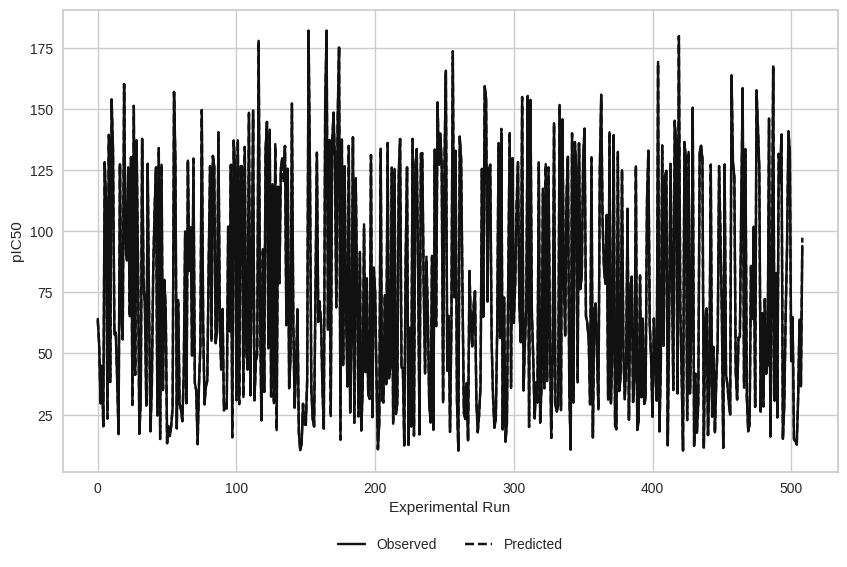

In [89]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [90]:
Y_test_pred = model.predict(X_test)

In [91]:
Y_test_pred

array([ 45.812 , 141.4128,  68.6603, 149.815 , 150.4726,  67.8178,
        29.4493,  51.9671, 128.6548, 136.535 ,  18.339 ,  67.6363,
        21.1114, 137.3121,  73.9259,  64.5782, 126.0328, 110.3313,
        46.5431,  61.571 ,  46.0089,  55.5301, 144.062 ,  38.2891,
        16.0855,  89.8524, 126.4052, 142.717 ,  71.1633,  44.1636,
       125.4267,  29.5964,  36.3452, 148.0233,  32.0472,  45.5469,
        49.014 ,  13.6795,  86.4969, 127.4654,  69.5574,  61.8055,
        56.5603,  29.5805,  70.9887, 132.2534,  29.6745, 127.6221,
        39.6253,  47.3582,  75.0355,  85.1282,  61.7609,  28.5718,
        30.0207, 142.135 ,  39.5454,  17.6049,  83.0138,  36.5983,
        77.9205, 126.187 ,  27.8396, 127.1655, 138.9789,  63.3864,
       149.5   ,  66.6336,  75.692 , 129.379 , 172.668 ,  33.8221,
       119.9637,  33.3425,  11.2161,  88.6413,  29.2853, 145.574 ,
       127.8651,  92.5119,  25.856 , 135.221 ,  44.0312,  92.1537,
        96.9742,  29.1629,  99.6019,  15.3561,  11.0093,  83.7

In [92]:
len(Y_test_pred)

219

In [93]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [94]:
predictions2

,Y_test,Y_test_pred
411,54.77,45.8120
364,141.60,141.4128
684,68.84,68.6603
190,148.90,149.8150
192,147.30,150.4726
...,...,...
233,132.40,132.5400
228,134.00,134.3030
460,25.30,25.3900
657,79.49,79.0401


In [95]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.9927


In [96]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.9927


In [97]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 1.1793


In [98]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 3.9172


In [99]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.9927


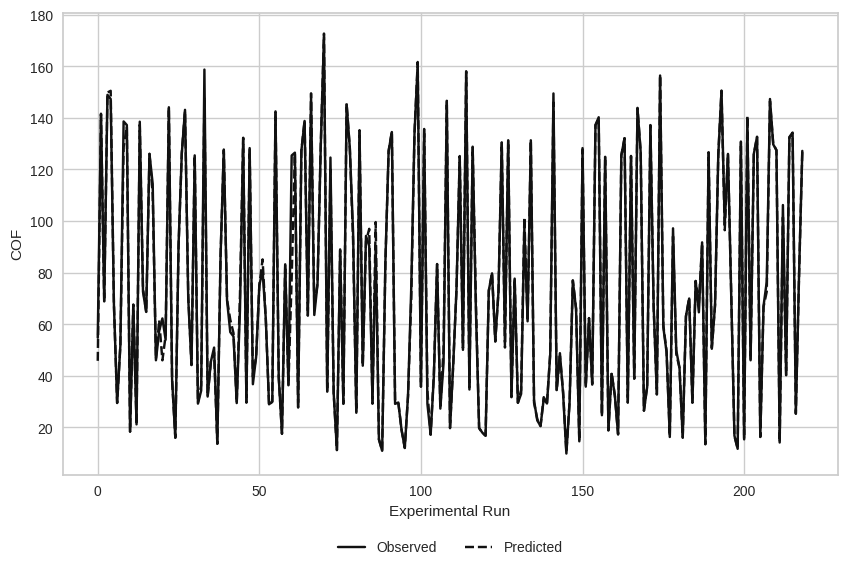

In [100]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('COF')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

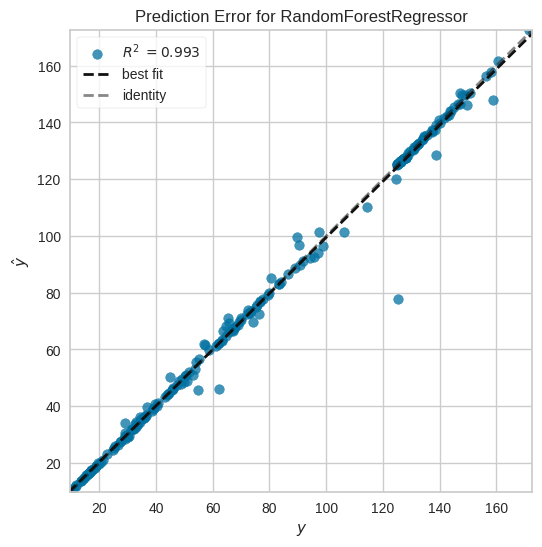

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [101]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

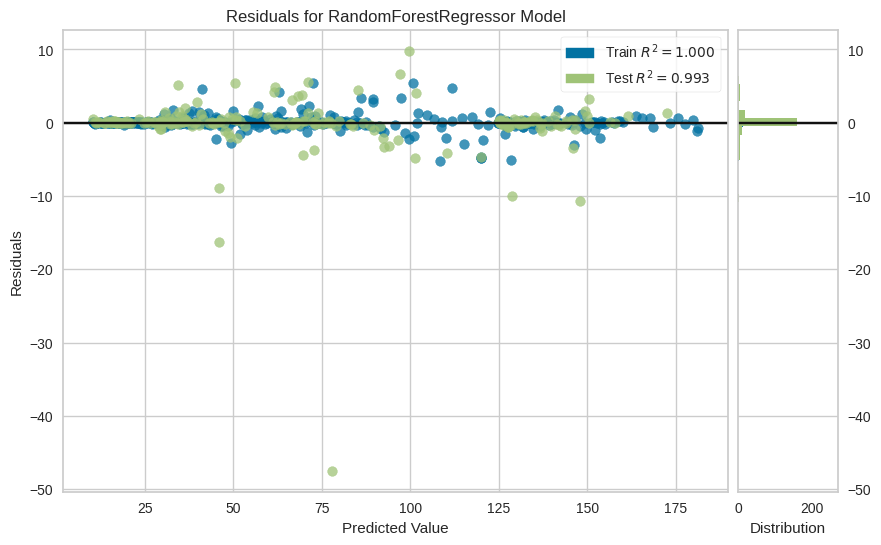

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [102]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

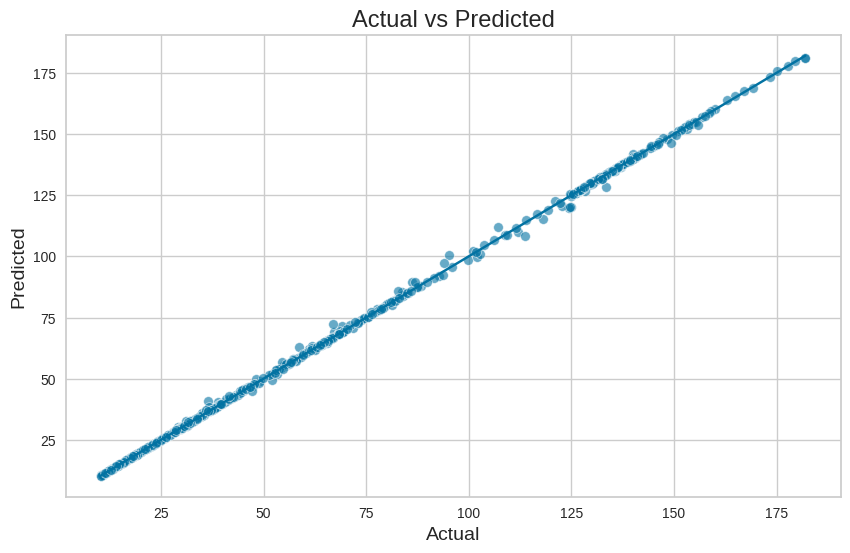

In [103]:
sns.scatterplot(x=Y_train, y=Y_train_pred, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

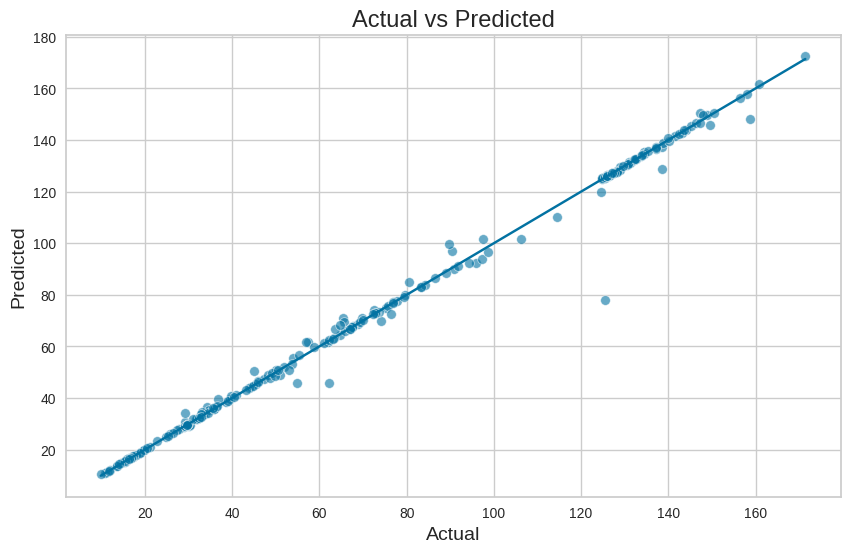

In [104]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

In [105]:
model.score(X_test, Y_test)

0.9927154763322257

In [106]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

3.92

In [107]:
my_param_grid = {'n_estimators':[10, 100, 500], 'max_features':['sqrt', 'log2'], 'max_depth': [5,10,20]}

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [110]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [111]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.974 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.980 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.972 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.980 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.968 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.986 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.979 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.985 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.979 total time=  

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [112]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [113]:
Y_test_optimised = grid.predict(X_test)

In [114]:
Y_test_optimised

array([ 45.42386, 132.85098,  68.68524, 149.4436 , 149.41344,  67.83894,
        29.61202,  52.0283 , 128.57268, 136.6442 ,  18.30918,  67.63732,
        21.11876, 128.72296,  72.76686,  64.55504, 126.03188, 113.88588,
        46.33076,  55.67102,  49.09038,  54.29288, 143.9908 ,  38.39664,
        16.0618 ,  89.9534 , 126.33914, 142.5108 ,  70.61316,  43.09996,
       125.44666,  29.59896,  38.1309 , 137.6246 ,  32.10568,  45.4351 ,
        53.89236,  13.67078,  86.61622, 127.43786,  69.73614,  55.2938 ,
        54.72336,  29.59272,  68.94716, 132.13364,  29.58912, 127.62876,
        38.79114,  47.27804,  75.02188,  83.06558,  61.88036,  28.61454,
        29.77696, 141.9936 ,  39.53656,  17.60934,  82.71998,  36.36254,
       113.30662, 126.68686,  27.90128, 127.1631 , 138.9433 ,  63.48974,
       147.69804,  63.34248,  75.62708, 129.22664, 172.58226,  33.67144,
       123.92464,  33.25074,  11.3283 ,  88.1436 ,  29.37366, 145.484  ,
       128.63442,  93.01524,  26.02   , 135.8346 , 

In [115]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
411,54.77,45.8120,45.42386
364,141.60,141.4128,132.85098
684,68.84,68.6603,68.68524
190,148.90,149.8150,149.44360
192,147.30,150.4726,149.41344


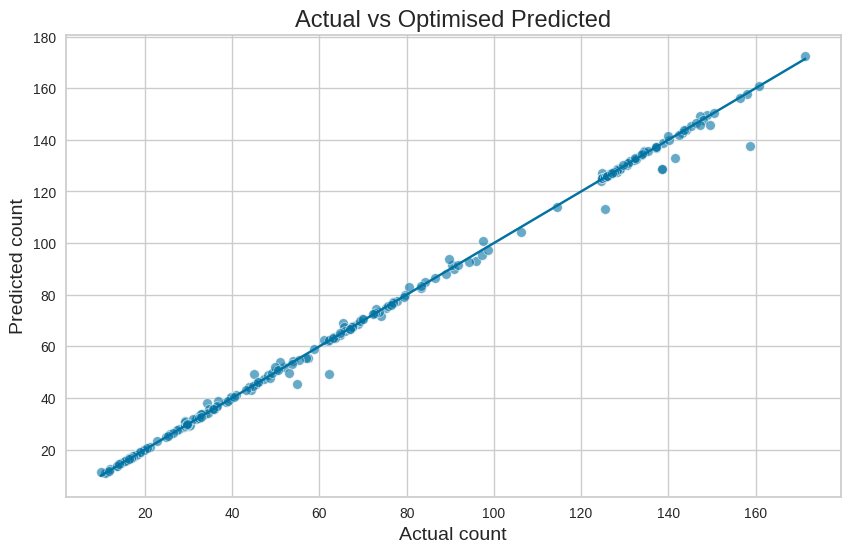

In [116]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [117]:
grid.score(X_test, Y_test)

0.9971163695883403

In [118]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

2.46

In [119]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.9960


In [120]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.9201


In [121]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 2.4646


In [122]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.9971


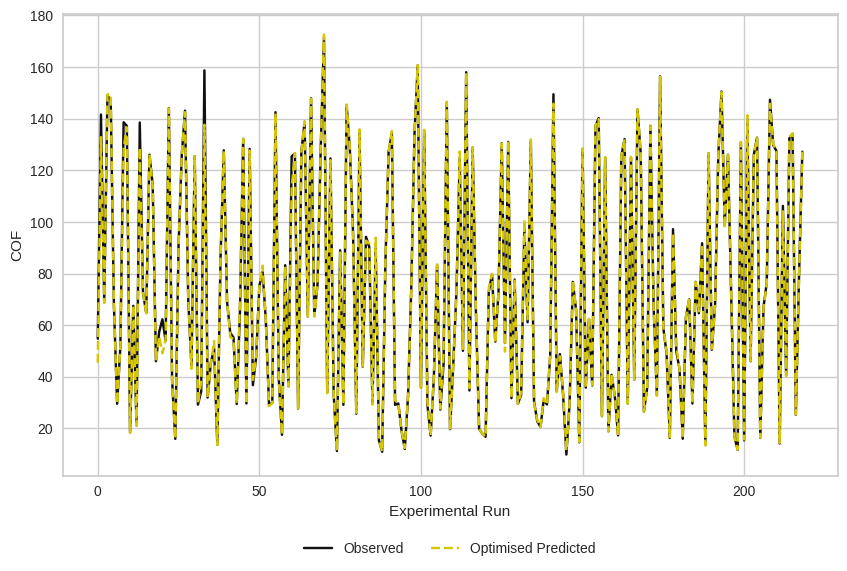

In [123]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'y', linestyle = '--')
plt.ylabel('COF')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [124]:
Y_train_optimised = grid.predict(X_train)

In [125]:
Y_train_optimised

array([ 63.86756,  53.90376,  29.59764,  44.92644,  20.23408, 128.1708 ,
       111.1377 ,  23.48564, 139.2354 ,  38.23034, 153.8538 , 133.2101 ,
        57.78638,  58.12172,  38.64218,  17.05958, 127.38828,  66.36498,
        55.92414, 159.9036 ,  96.15628,  87.92404, 126.01848,  65.27928,
       130.5758 ,  29.07548, 151.2584 ,  41.49914, 136.9304 ,  88.95632,
        17.1632 ,  31.20308, 137.67606,  79.40718,  69.05828,  28.55912,
       127.64084,  67.85576,  18.14876,  36.8584 ,  82.32036, 108.62972,
       126.0383 ,  24.7758 , 134.06356,  15.03946, 127.15096,  35.35152,
        80.35306,  68.0969 ,  13.32516,  20.37516,  16.27174,  20.6561 ,
        28.14412, 156.6982 , 128.7918 ,  19.4489 ,  71.18064,  29.60544,
        26.99734,  22.31474,  41.37302,  99.41444,  29.58142, 128.95334,
        84.0755 , 101.80334,  49.16092, 129.6198 ,  37.95924,  34.8849 ,
        12.96224,  37.49034,  52.9897 , 149.3204 ,  61.0139 ,  29.8799 ,
        36.74402,  39.16188,  88.45036, 126.67016, 

In [126]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
14,64.13,63.5706,63.86756
572,53.88,53.8964,53.90376
147,29.65,29.6267,29.59764
590,44.97,44.9715,44.92644
483,20.26,20.2596,20.23408


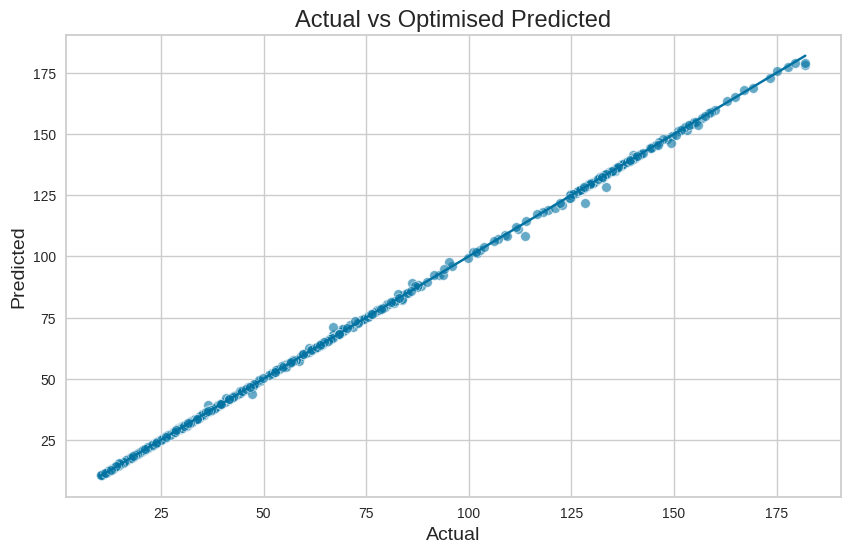

In [127]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [128]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9998


In [129]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.2787


In [130]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.6840


In [131]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9998


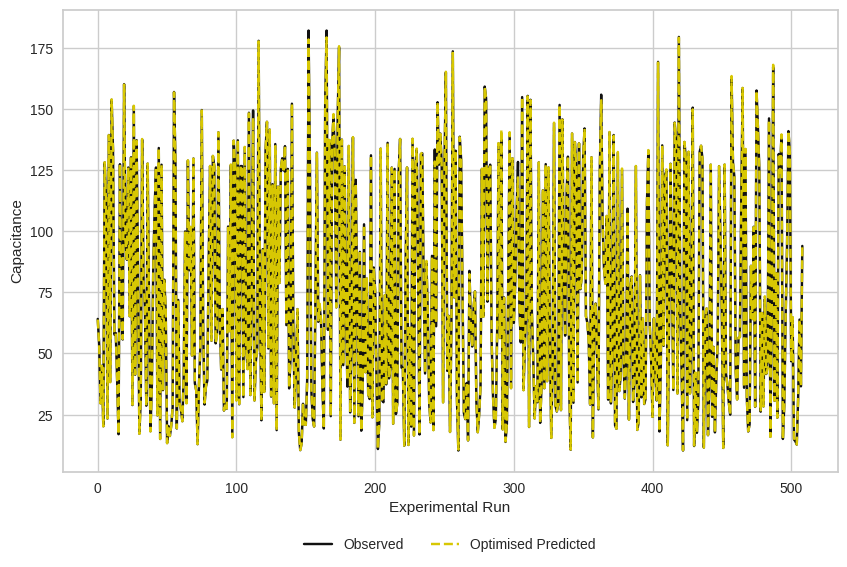

In [132]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'y', linestyle = '--')
plt.ylabel('Capacitance')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

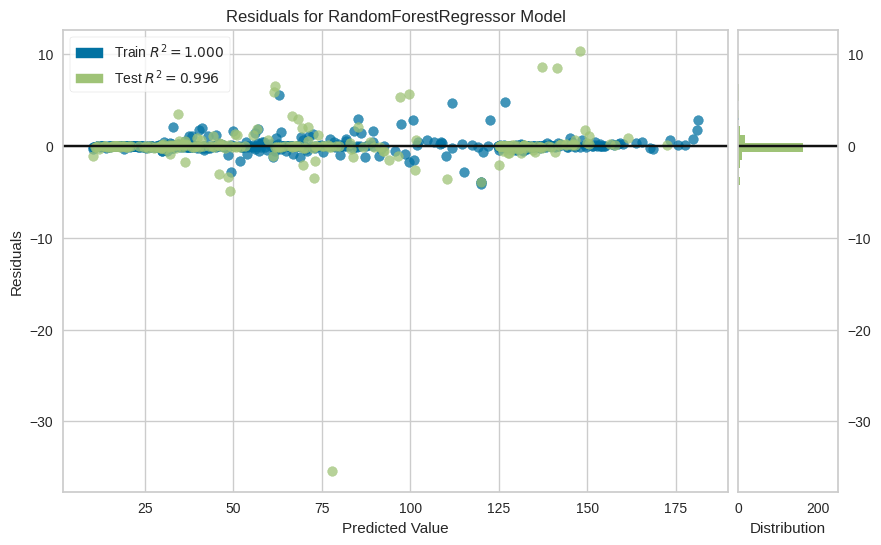

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [133]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [134]:
features = list(X_train.columns)

In [135]:
features

['Material 1',
 'Material 2',
 'Electrolyte',
 'Electrode Configuration',
 'N%',
 'Pore size distribution (cm3 g-1 nm-1)',
 'Pore diameter (nm)',
 'Average Pore Diameter (nm)',
 'SSA (m2/g)',
 'Vt cm3/g',
 'Electrolytr Concentration (mol/L)',
 'Scan rate (mV/s)',
 'Rs (Ohm)',
 'Rct (Ohn)',
 'Electrolytr Ionic Conductivity ( S/cm)',
 'Potential (V)',
 'Current Density (A/g)']

In [136]:
RFR = RandomForestRegressor(random_state=seed, n_estimators = 100, max_features='sqrt', max_depth=10)

In [137]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=1)

In [138]:
importance = RFR.feature_importances_
importance

array([0.02143081, 0.03881976, 0.02658169, 0.00577921, 0.0517236 ,
       0.06265901, 0.03399407, 0.14642346, 0.04500009, 0.03141817,
       0.02544994, 0.03070099, 0.2101885 , 0.07436337, 0.08822498,
       0.03484415, 0.07239819])

In [139]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,Material 1,0.021431
1,Material 2,0.038820
2,Electrolyte,0.026582
3,Electrode Configuration,0.005779
4,N%,0.051724
5,Pore size distribution (cm3 g-1 nm-1),0.062659
6,Pore diameter (nm),0.033994
7,Average Pore Diameter (nm),0.146423
8,SSA (m2/g),0.045000
9,Vt cm3/g,0.031418


<Figure size 8000x4800 with 0 Axes>

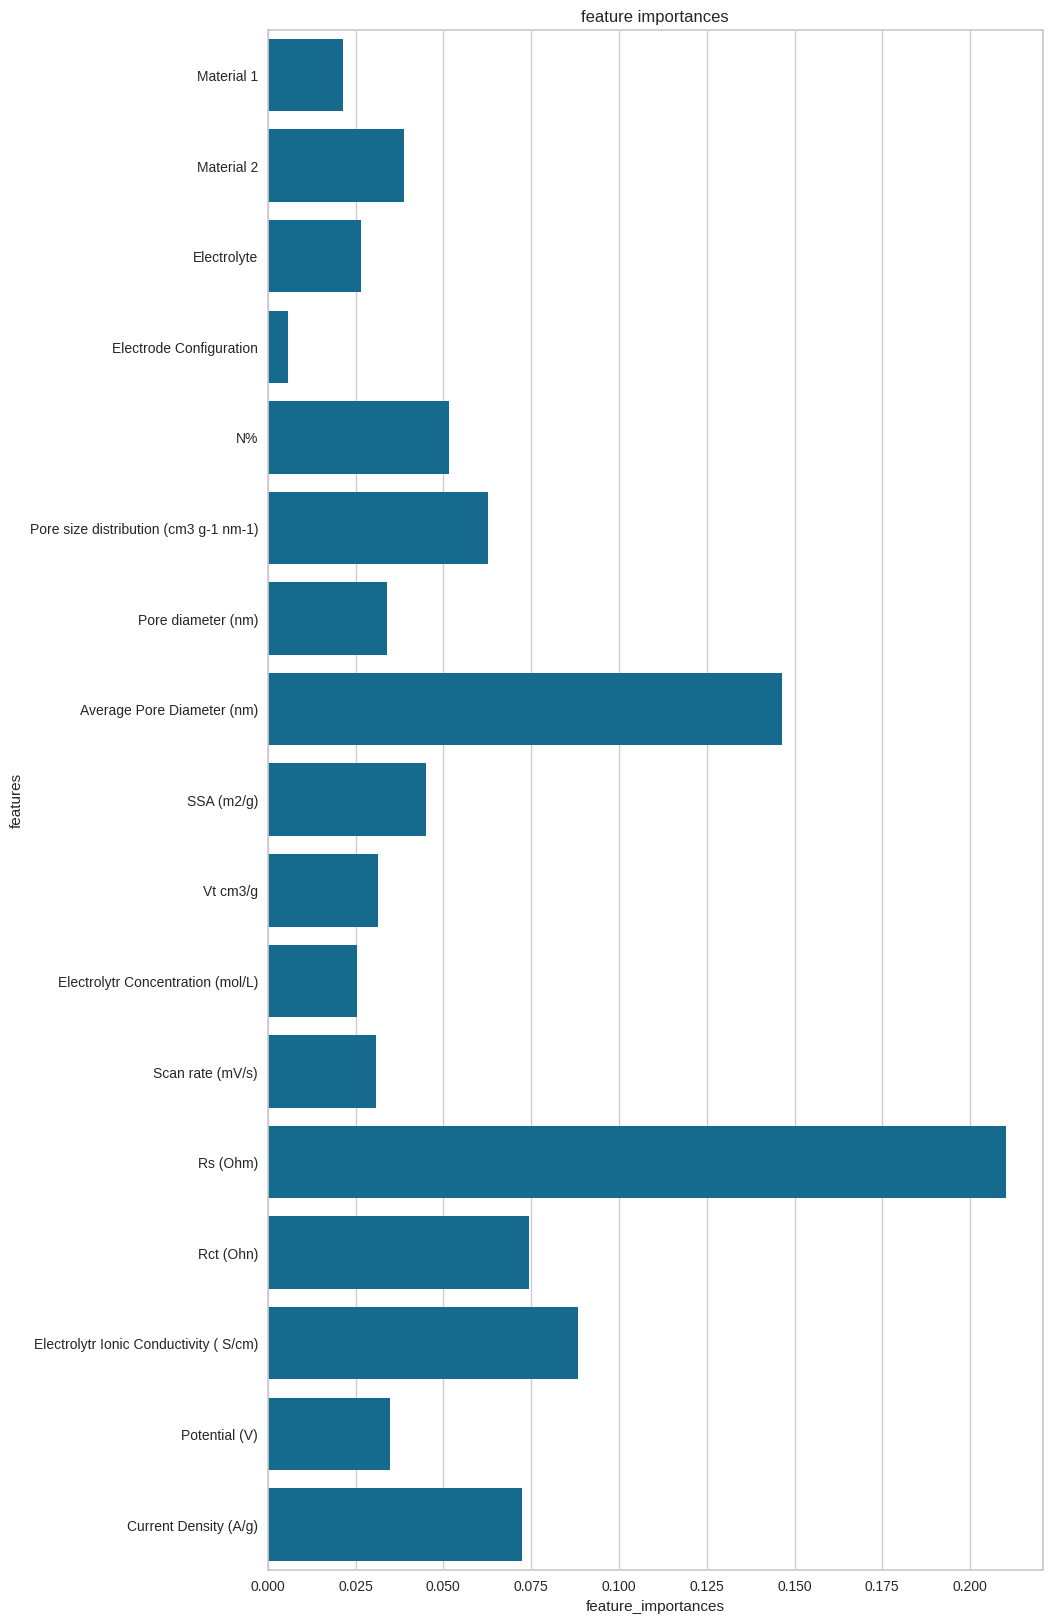

In [140]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.savefig('figrfr2.png')

plt.show()

In [141]:
!pip install shap